# Simon's algorithm

Algorytm Simona jest przykładem algorytmu, który działa eksponencjalnie szybciej dla komputerów kwantowych (w porównaniu z klasycznymi.)

Pozwala na stwierdzenie, czy zadana funkcja $ f:\{0,1\}^n\to\{0,1\}$ jest dwuznaczna (dla każdej wartości $f$ istnieją dwa takie $x$, że $f(x_1)=f(x_2)$) czy jednoznaczna. Wiadomo również, że $x_1\bigoplus x_2=secret$. Wykorzystując algorytm można znaleźć $secret$, przy czym dla $secret =00..0$ funkcja jest jednoznaczna.

Po wykonaniu niezbędnych operacji i pomiarze (w którym uzyskano stany $z$) można stworzyć układ równań z warunku
$$
z\cdot s =0~ \mod 2,
$$
którego rozwiązanie da szukany $secret$.

Przykładowy schemat dla 6 qubitów i sekretu $100$.

![](./circuits/simon-100.png)

In [ ]:
from openql import openql as ql
import numpy as np
from utils import simulate, plot_histogram, random_state

In [ ]:
ql.initialize()
compiler = ql.Compiler("compiler", "./config/compiler-config.json")

platform = ql.Platform("platform", "none")
platform.set_compiler(compiler=compiler)


In [ ]:
def oracle(nqubits: int, k: ql.Kernel, secret: str):
    for q in range(nqubits):
        k.cnot(q, q + nqubits)
    if "1" in secret:
        for i, q in enumerate(secret):
            if q == "1":
                value = i
                for i, q in enumerate(secret):
                    if q == "1":
                        k.cnot(value, nqubits + i)
                break


def check(s: str, z: str):
    dot = 0
    for i, j in zip(s, z):
        dot += int(i) * int(j)

    mod_two = dot % 2
    print(f"{secret}.{z} = {mod_two}")


def what_to_solve_for_three_qubits(z):
    print(f"a.{z[0]} + b.{z[1]} + c.{z[2]} = 0 ")



In [ ]:
nqubits = 3

secret = random_state(nqubits)
print(f"{secret=}")

program = ql.Program("simons", platform, 2 * nqubits)
k = ql.Kernel("kernel", platform, 2 * nqubits)

for q in range(nqubits):
    k.hadamard(q)

oracle(nqubits, k, secret)

for q in range(nqubits):
    k.hadamard(q)

for q in range(nqubits):
    k.measure(q)

program.add_kernel(k)
program.compile()


secret='110'


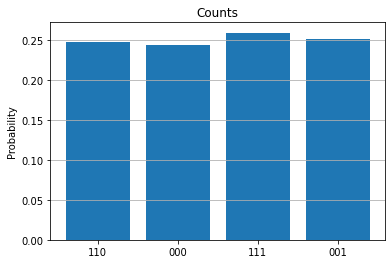

110.110 = 0
110.000 = 0
110.111 = 0
110.001 = 0


In [ ]:
counts = simulate(program=program, measured=range(nqubits), shots=2048)
plot_histogram(counts=counts)

for z in counts:
    check(secret, z)


In [ ]:
if nqubits == 3:
    print("Układ równań do rozwiązania, aby znaleźć secret=abc.")
    print("'.' oznacza działanie modulo 2 na iloczyn skalarny")
    for z in counts:
        what_to_solve_for_three_qubits(z)

# Można to rozwiązać już klasycznie

Układ równań do rozwiązania, aby znaleźć secret=abc.
'.' oznacza działanie modulo 2 na iloczyn skalarny
a.1 + b.1 + c.0 = 0 
a.0 + b.0 + c.0 = 0 
a.1 + b.1 + c.1 = 0 
a.0 + b.0 + c.1 = 0 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dedd1051-cb34-4841-b8e5-79089caae121' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>